## Lesson 7 - Outlier detection

**Task:** 
This project has two parts. 
- 1) In the first part, you will run a regression, and identify and remove the 10% of points that have the largest residual errors. Then you’ll remove those outliers from the dataset and refit the regression, just like the strategy that Sebastian suggested in the lesson videos.

- 2) In the second part, you will get acquainted with some of the outliers in the Enron finance data, and learn if/how to remove them.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import sys
sys.path.append("../outliers/")

filePath = '/Users/omojumiller/mycode/MachineLearningNanoDegree/IntroToArtificialIntelligence/outliers/'
import random
import numpy
import pickle
import matplotlib.pyplot as pyplt
import seaborn as sns


from outlier_cleaner import outlierCleaner


In [5]:
### load up some practice data with outliers in it
ages = pickle.load( open(filePath+'practice_outliers_ages.pkl', "r") )
net_worths = pickle.load( open(filePath+"practice_outliers_net_worths.pkl", "r") )


In [6]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features

ages = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, 
                                                                    net_worths, test_size=0.1, random_state=42)


In [7]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(ages_train, net_worths_train)
print "slope of regression is %.2f" % reg.coef_
print "intercepts of regression is %.2f" % reg.intercept_





slope of regression is 5.08
intercepts of regression is 25.21


In [8]:
print "\n ********stats on dataset********\n"
print "r-squared score on testing data: ", reg.score(ages_test, net_worths_test)
print "r-squared score on training data: ", reg.score(ages_train, net_worths_train)


 ********stats on dataset********

r-squared score on testing data:  0.878262470366
r-squared score on training data:  0.489872596175


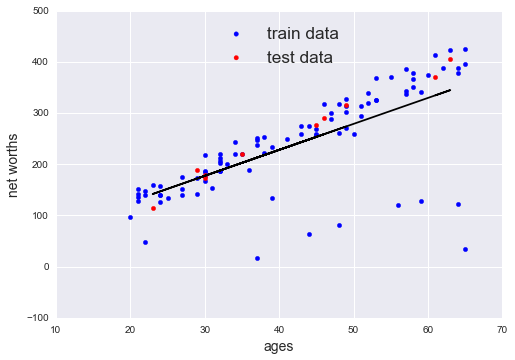

In [9]:

pyplt.clf()
pyplt.scatter(ages_train, net_worths_train, color="b", label="train data")
pyplt.scatter(ages_test, net_worths_test, color="r", label="test data")
pyplt.plot(ages_test, reg.predict(ages_test), color="black")
pyplt.legend(loc='upper center', shadow=True, fontsize='x-large')
pyplt.xlabel("ages", fontsize=14)
pyplt.ylabel("net worths", fontsize=14)
pyplt.show()

